In [1]:
import locale

import folium
import matplotlib.pyplot as plt
import pandas as pd


try:
    locale.setlocale(locale.LC_ALL, 'portuguese_brazil')
except:
    locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
    
pd.options.display.float_format = lambda x: locale.format('%.2f', x, True)


%matplotlib notebook

In [2]:
erb_brasil = pd.read_csv('../data/dataset-erb-BR.csv', sep=';', encoding='Latin1')
erb_brasil['Licenciada'] = erb_brasil['Data 1º Lic.'].map(lambda x: False if pd.isnull(x) else True)
erb_brasil.head()

,num_operadora,sgl_operadora,nom_operadora,Estação,Nome,UF,Município,Bairro,Logradouro,Latitude,Longitude,Data Cadastro,Data 1º Lic.,Última Licença,Licenciada
0,4152433,NEXTEL,NEXTEL TELECOMUNICACOES LTDA,698421370,ACCRBO009OU,AC,Rio Branco,Vila Nova,Avenida Antônio da Rocha Viana - nº s/n,"-9,56","-67,49",10/12/2012,09/01/2013,09/06/2014,True
1,4152433,NEXTEL,NEXTEL TELECOMUNICACOES LTDA,699136172,ACCRBO004OU,AC,Rio Branco,Conjunto Tangará,"Avenida Nações Unidas, s/n° - nº S/N","-9,58","-67,50",01/07/2013,12/09/2013,09/06/2014,True
2,4152433,NEXTEL,NEXTEL TELECOMUNICACOES LTDA,699136237,ACCRBO013OU,AC,Rio Branco,Alumínio,Rua 05 Quadra 7 Lote 17 - nº S/N,"-9,57","-67,50",01/07/2013,12/09/2013,09/06/2014,True
3,4152433,NEXTEL,NEXTEL TELECOMUNICACOES LTDA,699521963,ACCRBO001OU,AC,Rio Branco,Barro Preto,Travessa Santa Tereza esquina com Invernada - ...,"-9,58","-67,47",25/10/2013,13/02/2014,09/06/2014,True
4,4152433,NEXTEL,NEXTEL TELECOMUNICACOES LTDA,699521980,ACCRBO002OU,AC,Rio Branco,Centro,Avenida Francisco Pinheiro - nº s/n,"-10,01","-67,47",25/10/2013,13/02/2014,09/06/2014,True


In [3]:
colors = {'ALGAR': '#4591BD', 
          'CLARO': '#D7321E',
          'ERCOMTEL': '#374C92',
          'NEXTEL': '#FF5B00',
          'TIM': '#0B3D86',
          'TELEFÔNICA': '#660099',
          'OI': '#FFCE3C'}

<IPython.core.display.Javascript object>


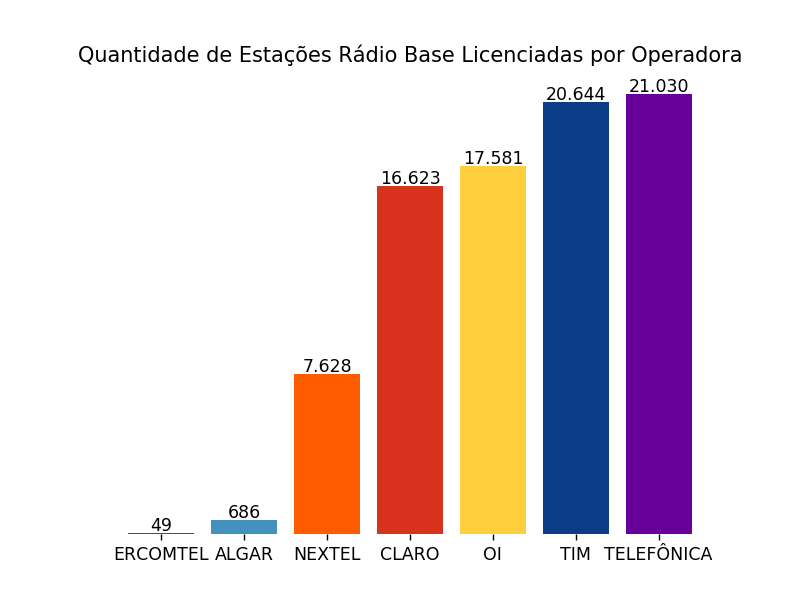

In [11]:
fix, ax = plt.subplots()
ax.set_title('Quantidade de Estações Rádio Base Licenciadas por Operadora')
erb_operadora_br = erb_brasil.query('Licenciada == True').groupby('sgl_operadora')[['Estação']].count().sort_values(by='Estação')
erb_operadora_br = erb_operadora_br.rename(columns={'Estação': 'Qtd. ERB'})
index = range(len(erb_operadora_br))
color = [colors.get(i, 'r') for i in erb_operadora_br.index]

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(labelleft='off', left='off', right='off')
ax.set_xticks(index)
plt.bar(index, erb_operadora_br['Qtd. ERB'], color=color)
plt.xticks(index, erb_operadora_br.index)

for n, i in enumerate(ax.patches):    
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()    
    label = locale.format('%.0f', int(y), True)
    ax.text(x, y + 100, label, horizontalalignment='center')    

<IPython.core.display.Javascript object>


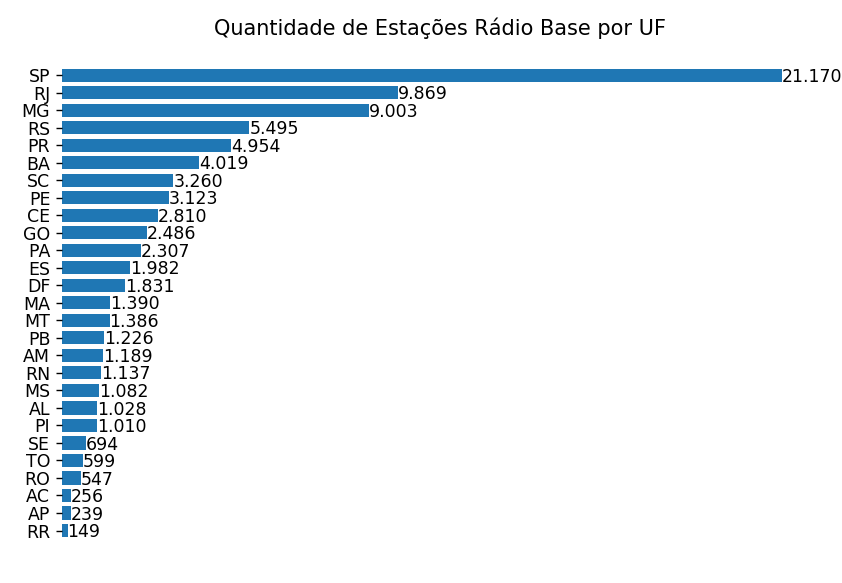

In [61]:
fix, ax = plt.subplots()
ax.set_title('Quantidade de Estações Rádio Base por UF')
erb_uf = erb_brasil.query('Licenciada == True').groupby('UF')[['Estação']].count().sort_values(by='Estação')
erb_uf =erb_uf.rename(columns={'Estação': 'Qtd. ERB'})
index = range(len(erb_uf))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(bottom='off', labelbottom='off')
ax.set_yticks(list(range(0, len(erb_uf) * 4, 4)))
plt.barh(list(range(0, len(erb_uf) * 4, 4)), erb_uf['Qtd. ERB'], height=3)
plt.yticks(list(range(0, len(erb_uf) * 4, 4)), erb_uf.index)

for n, i in enumerate(ax.patches):    
    x = i.get_width()
    y = i.get_y()        
    label = locale.format('%.0f', int(x), True)
    ax.text(x, y, label, horizontalalignment='left')    

plt.tight_layout()